In [3]:
import numpy as np
import pyvista as pv
from scipy import interpolate
from matplotlib import pyplot as plt
import matplotlib
%matplotlib notebook
matplotlib.rc('lines', lw=2)
matplotlib.rc('font',**{'sans-serif':'Arial','family':'Helvetica'})
matplotlib.rc('xtick',**{'direction':'in'})
matplotlib.rc('ytick',**{'direction':'in'})

In [103]:
obj = pv.read('../results/wall_90.vtk')

In [104]:
ind = (obj.points[:,1] == -1.5)*(obj.points[:,2] >= 0)
obj.points[ind,:].shape
x = obj.points[ind,0]+22.5;
z = obj.points[ind,2];
T = obj.point_data['temp'][ind]

In [105]:
xx = np.linspace(0.375,44.625,60)
zz = np.linspace(29.625,0.375,40)
[xx,zz] = np.meshgrid(xx,zz)

In [106]:
TT = interpolate.griddata(np.vstack((x,z)).T,T,(xx,zz), method='linear')
TT[np.isnan(TT)] = 373
TT[TT<373] = 373

<IPython.core.display.Javascript object>


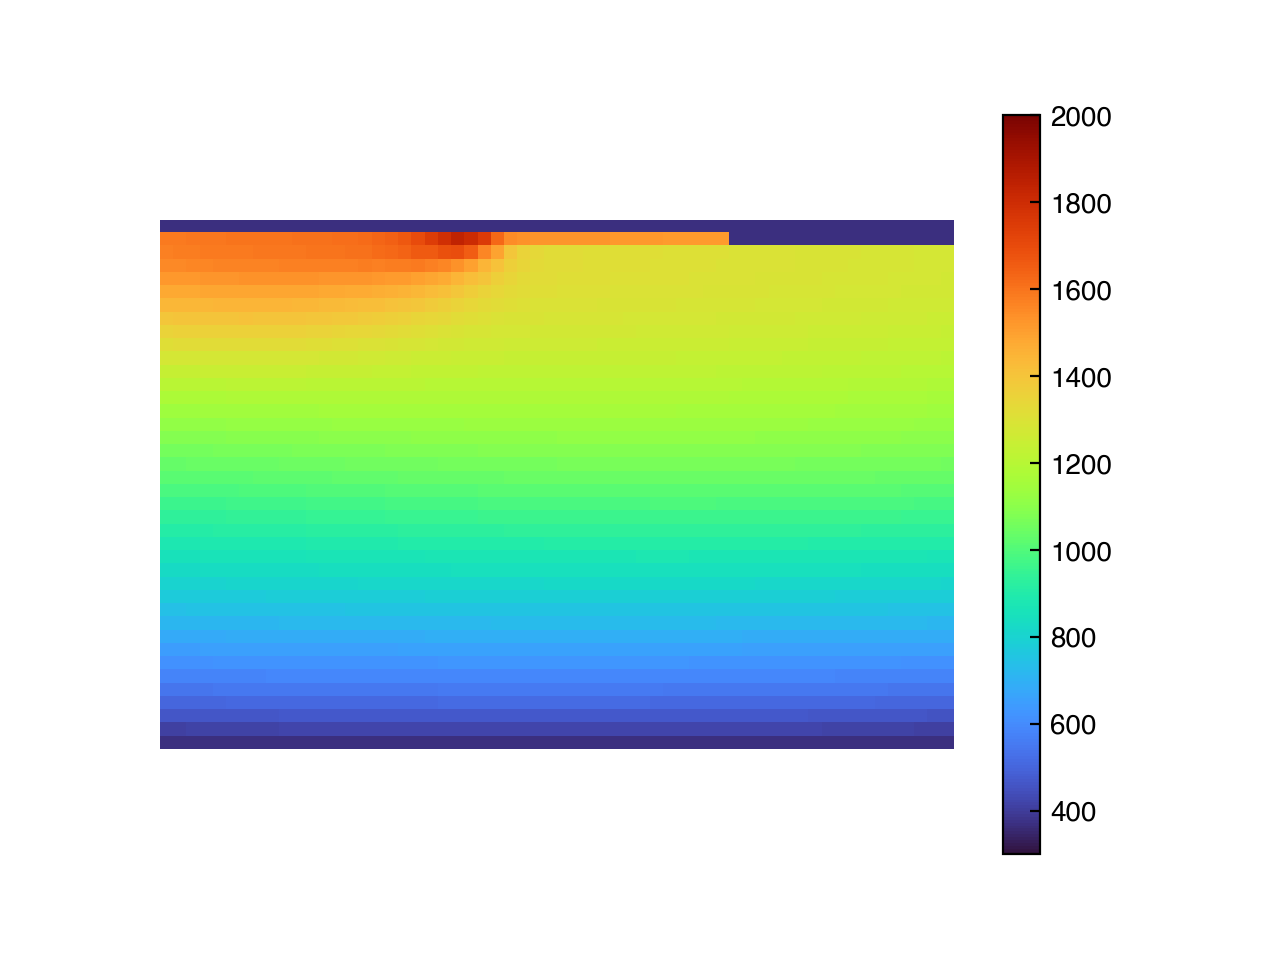

In [107]:
plt.figure()
plt.imshow(TT,vmin=300,vmax=2000,cmap='turbo')
plt.colorbar()
plt.axis('off')
plt.show()

In [108]:
IR_data[11,5]

1591.2175

<IPython.core.display.Javascript object>


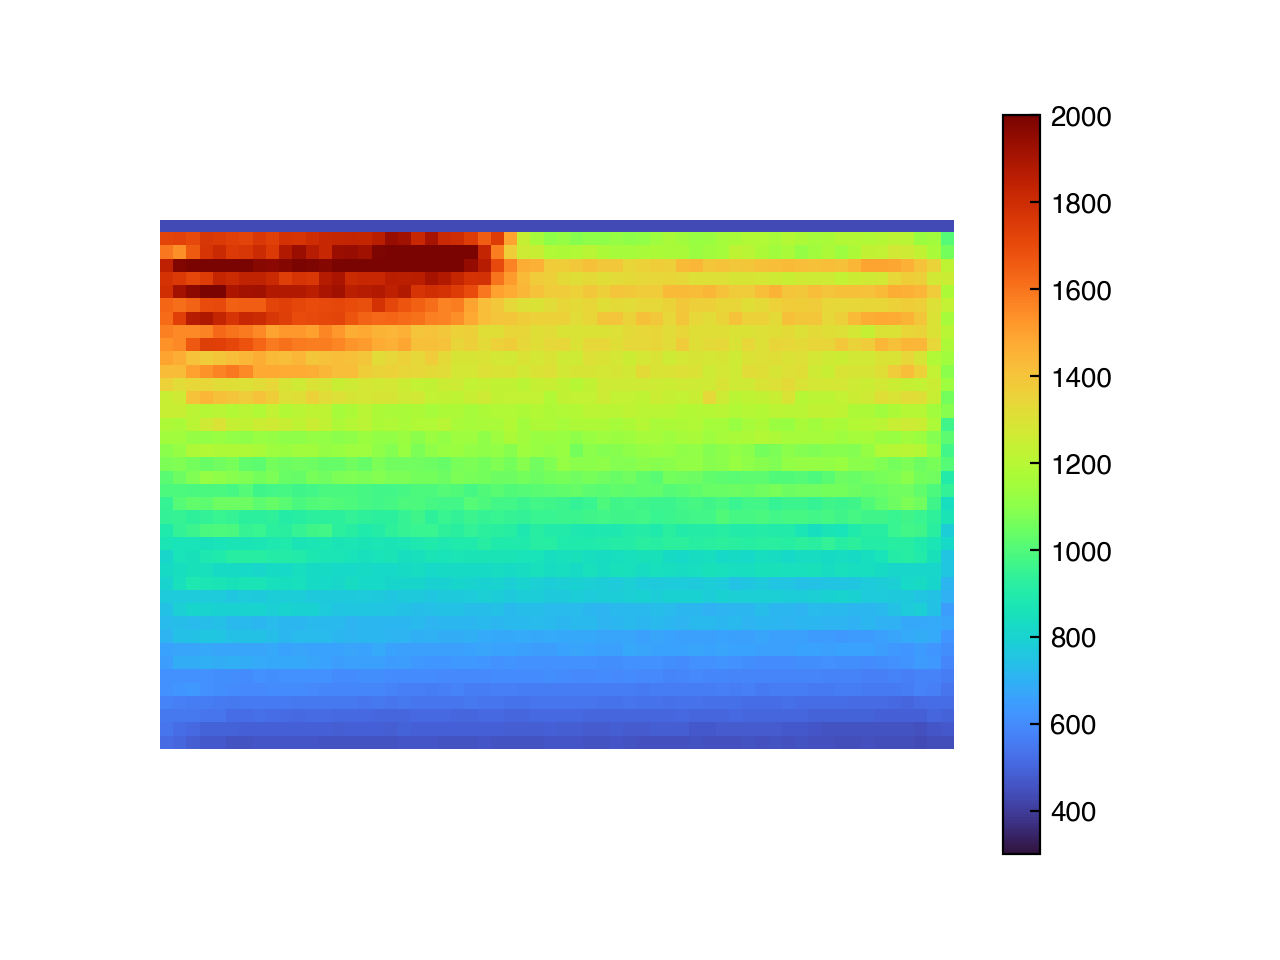

In [109]:
IR_data = np.load('processed_data.npy')[int(270*50.124635)].T
plt.figure()
plt.imshow(IR_data,vmin=300,vmax=2000,cmap='turbo')
plt.colorbar()
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


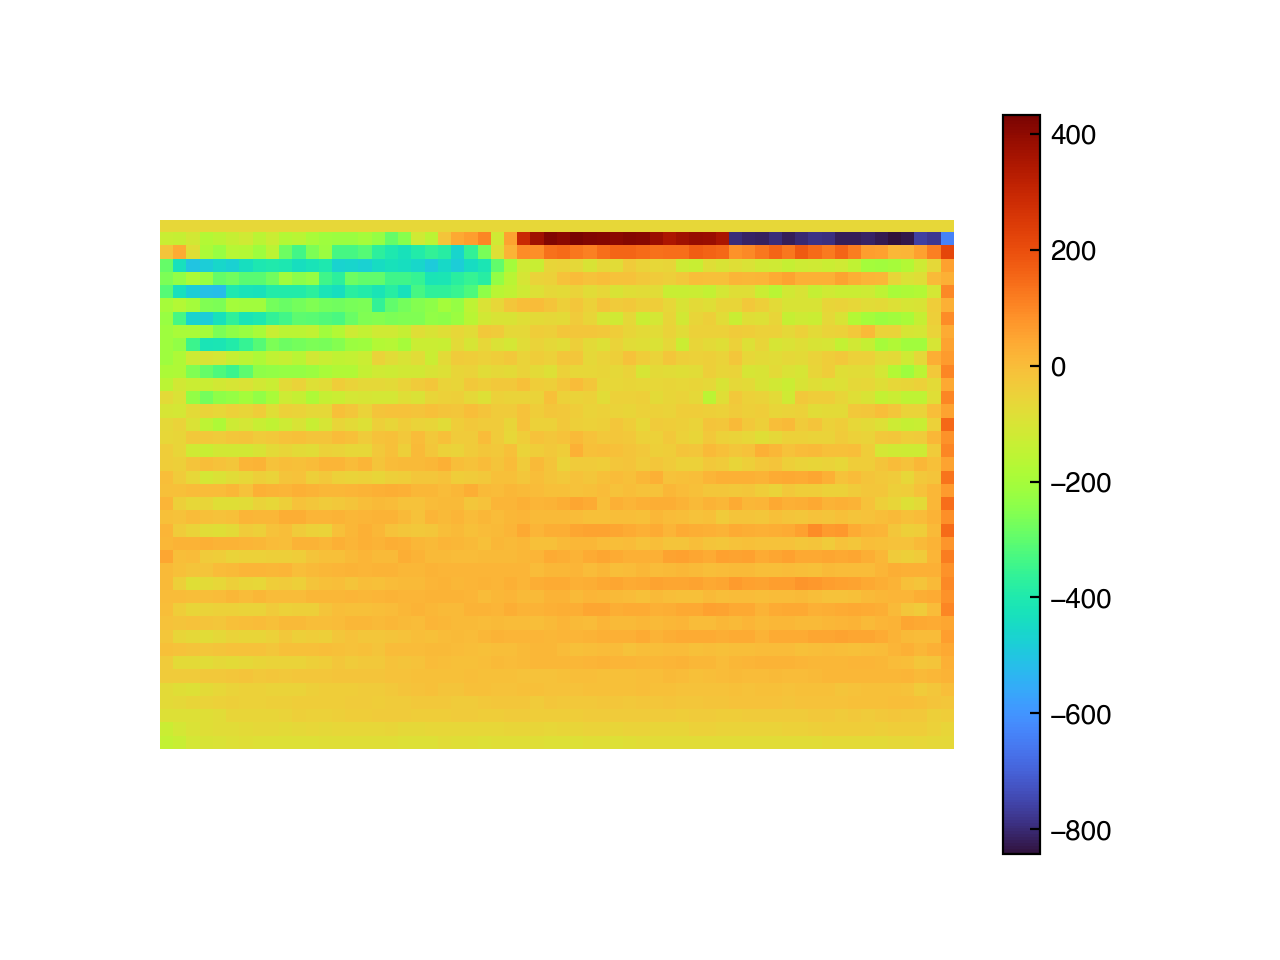

In [110]:
plt.figure()
plt.imshow(TT-IR_data,cmap='turbo')
plt.colorbar()
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


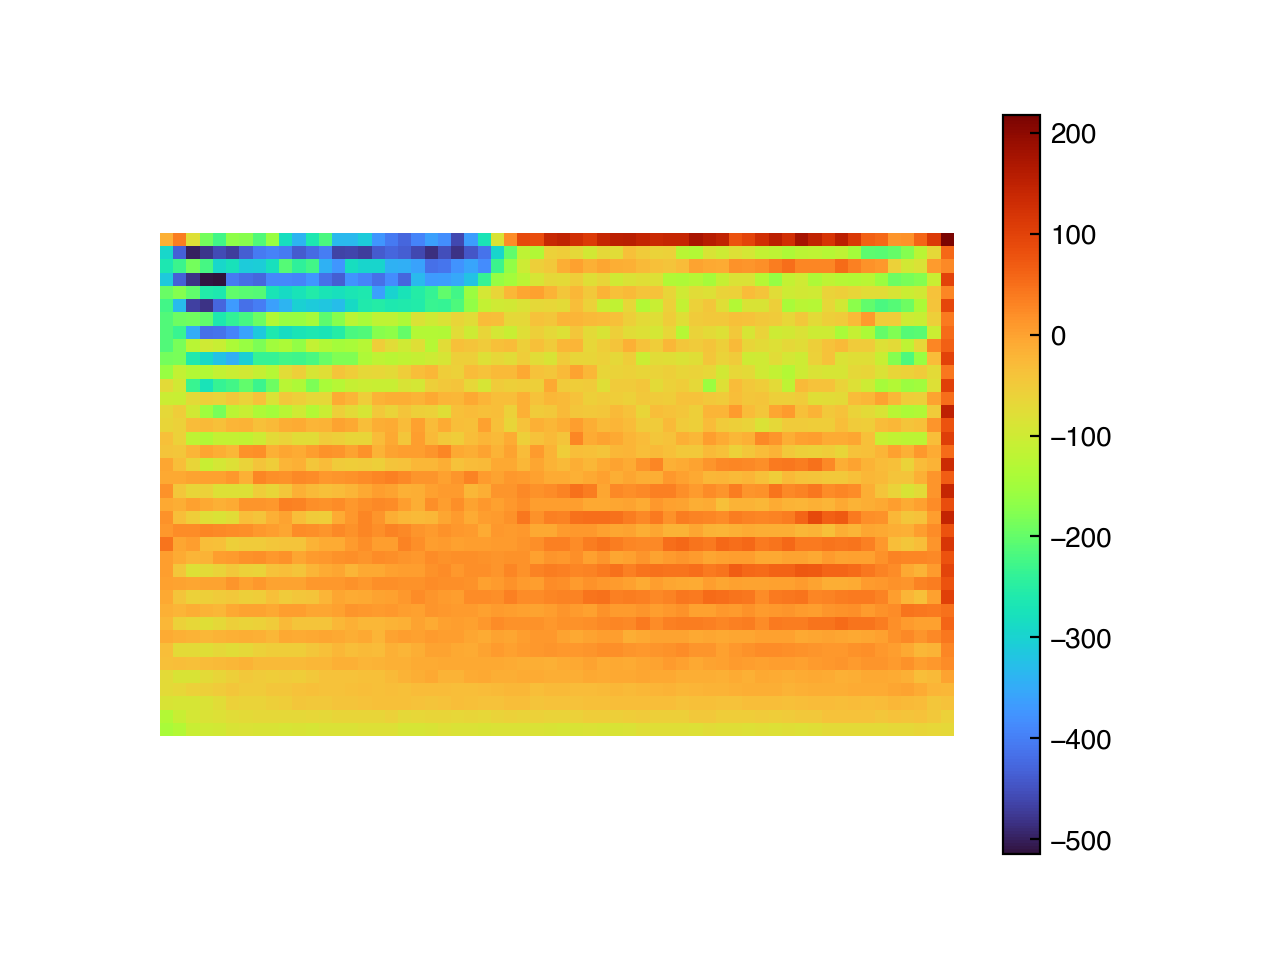

In [111]:
plt.figure()
plt.imshow((TT-IR_data)[2:],cmap='turbo')
plt.colorbar()
plt.axis('off')
plt.show()